# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 6 for August 15, 2018, 9:00 {-}

### 7.1 The old lighthouse keeper and the sea {-}

#### a: Translate the probability density distribution of the azimuth $\theta$ of the flashes into a probability density for observing a flash at location x.

To translate a probability density distribution P(X) of a random variable X to a PDF P(Y) with new random variable Y we can use the principle of conservation of probability:

$$\left| P(X) \, dX \right| = \left| P(Y) \, dY \right| \;\;\; ,$$

which we can write to

$$P(X) = P(Y) \, \left| \frac{dY}{dX} \right| \;\;\; .$$

With the usage of trigonometry we can derive the following equation:

$$tan(\Theta_k) = \frac{x_0 - x_k}{y_0} \; \Rightarrow \; \Theta_k = tan^{-1}\left( \frac{x_0 - x_k}{y_0} \right) \;\;\; .$$

The exercise states, that the light pulses are emitted randomly in every horizontal direction with no direction preferred and no existing correlation among the directions of the flashes. Therefore, we apply for the PDF $P(\Theta_k) = U(0, 2\pi)$ a uniform distribution from 0 to $\pi$ to get signals along the coast.
Now, to transform the PDF of the random variable $\Theta$ into the PDF of the random variable $x$, we apply the principle of conservation of probability, which gives us

$$P(x) = U(0, 2\pi) \, \left| \frac{d\Theta}{dx_k} \right| \;\;\; ,$$

where $$\left| \frac{d\Theta}{dx_k} \right| = \left| \frac{d}{dx_k} \, tan^{-1}\left( \frac{x_0 - x_k}{y_0} \right) \right| = \left| \frac{y_0}{(x_0 - x_k)^2 + y_0^2} \right| \;\;\; .$$

This gives us the full expression:

$$P(x_k) = U(0, 2\pi) \, \left| \frac{y_0}{(x_0 - x_k)^2 + y_0^2} \right| \;\;\; .$$ 

#### b: Late during the very evening in the pub the lighthouse keeper tells stories of the early days when he in fact had to manually row out to the lighthouse which lies “at least 2 miles off shore”. You interpret this statement as a distance of $\mathrm{(2.0\pm0.3)}$ miles distributed like a Gaussian. What is the Bayesian estimate of $\mathbf{y_0}$? Compare MAP, mean, and median of the posterior distribution! Compute also $\sigma_y$!

The likelihood is given by the product of the transformed PDF in terms of $x_k$ over all $x_k$s (see a) given our model M: $$L\left(\{x_k\}|y_0,\mathrm M\right)=\prod_{k}P(x_k)$$

For the prior is valid: $$P(y_0|\mathrm M)\sim\mathrm N(2,0.3)$$

Therefore, the posterior takes the form of $$P\left(y_0|\{x_k\},\mathrm M\right)\propto L\left(\{x_k\}|y_0,\mathrm M\right)P(y_0|\mathrm M).$$
As the the posterior has to be normalised anyway, we can "store" the normalisation of $\mathrm U(0,2\pi)$ within the likelihood, which is $1/2\pi$, and set $\mathrm U(0,2\pi)=1$ for the likelihood. In the following we consider the statistical properties of the posterior with respect to the model parameter $y_0$.

In [1]:
# read in data
data <- read.table("lighthouse.dat", header=FALSE)

# display some of the data
head(data)

data <- data$V1
length(data)

V1
-57.20
-18.53
-10.66
-4.79
-4.16
-2.59


[1] 64

We expect that the $x_k$ data is distributed like a Chauchy function around $x_0$. A first look on the data hints that this is indeed the case.

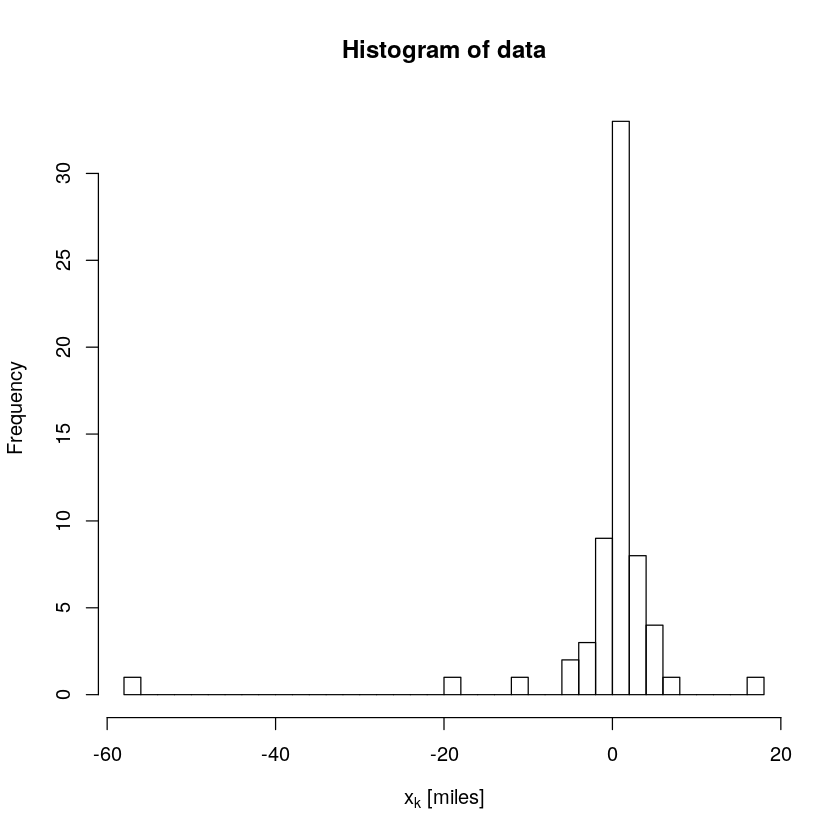

In [2]:
# histogram of x data
hist(data,breaks=50,xlab=expression('x'[k]*' [miles]'))

In [3]:
# function for the posterior with a gaussian prior

posterior1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)*dnorm(y,mean=2,sd=0.3)
}


In [4]:
# compute the posterior dependend for a y seq
yseq <- seq(0.0001,3,0.0001)

p1 <- yseq

for (i in 1:length(yseq)){
      p1[i] <- posterior1(yseq[i],data)
}

# integral
I <- mean(p1)*3

In [5]:
# new normalized posterior
posterior2 <- function(y,X){
    # likelihood times prior
    I**(-1)*prod(y*(y**2+(1.25-X)**2)**-1)*dnorm(y,mean=2,sd=0.3)
}

In [6]:
# compute normalized posterior for the sequence

p2 <- yseq
for (i in 1:length(yseq)){
      p2[i] <- posterior2(yseq[i],data)
}

In [7]:
# satistics
mode <- yseq[which.max(p2)]
mean <- sum(p2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(p2)/length(p2)*3-0.5)**2)]

sigy <- (sum(p2*yseq**2)*3/length(yseq)-mean**2)**0.5

cat('statistics\n---------------------')
cat('\nmode = ',mode,' miles')
cat('\nmean = ',mean,' miles')
cat('\nmedian = ',median,' miles')
cat('\nsigma_y = ',sigy,' miles')


statistics
---------------------
mode =  1.2986  miles
mean =  1.330114  miles
median =  1.3197  miles
sigma_y =  0.2096681  miles

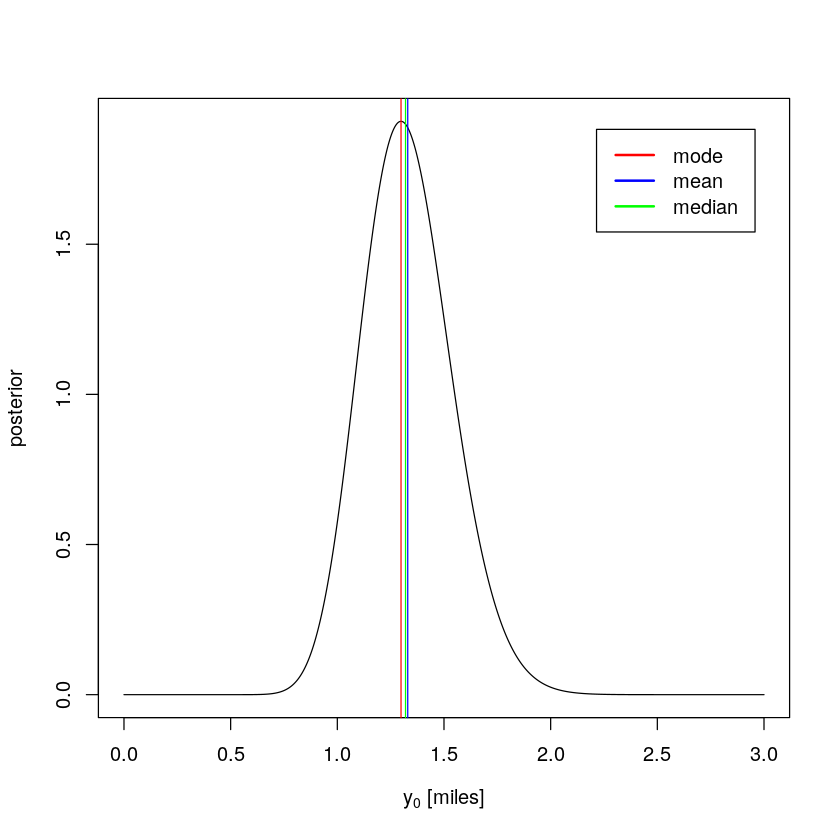

In [8]:
# plot the posterior dependend on y

plot(yseq,p2,'l',xlab=expression('y'[0]*' [miles]'),ylab='posterior')
abline(v=mode,col='red')
abline(v=mean,col='blue')
abline(v=median,col='green')

# legend
legend("topright", legend=c('mode','mean','median'), inset=.05, 
       lwd=2, col=c('red','blue','green'))

It becomes evident from the results and the plot above that MAP, mean & median are quite similar.

#### c: Comparing the location of the maxima of the likelihood function and posterior, you start to wonder whether the lighthouse keeper did exaggerate the level of hardship of the early days. Redo the the previous estimate with largely uninformative priors ignoring the keeper’s stories: a constant prior and ∝ 1/y . What do you get for the MAP distances? What do you conclude?

In [9]:
# posterior functions

# constant prior
posteriorcons1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)
}

# inverse y dependence prior
posteriorinv1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)/y
}


In [10]:
# compute the posteriors dependend for a y seq
yseq <- seq(0.0001,3,0.0001)

pcons1 <- yseq
pinv1 <- yseq

for (i in 1:length(yseq)){
      pcons1[i] <- posteriorcons1(yseq[i],data)
      pinv1[i] <- posteriorinv1(yseq[i],data)
}

# integrals
Icons <- mean(pcons1)*3
Iinv <- mean(pinv1)*3

In [11]:
# normalized posterior functions

posteriorcons2 <- function(y,X){
    # likelihood times prior
    Icons**-1* prod(y*(y**2+(1.25-X)**2)**-1)
}

posteriorinv2 <- function(y,X){
    # likelihood times prior
    Iinv**-1* prod(y*(y**2+(1.25-X)**2)**-1)/y
}

In [12]:
# compute normalized posterior for the sequence

pcons2 <- yseq
pinv2 <- yseq

for (i in 1:length(yseq)){
      pcons2[i] <- posteriorcons2(yseq[i],data)
      pinv2[i] <- posteriorinv2(yseq[i],data)
}

In [13]:
# statistics
cat('statistics\n=================================')

# cnostant prior
cat('\n\nconstant prior\n---------------------')
mode <- yseq[which.max(pcons2)]
mean <- sum(pcons2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(pcons2)/length(pcons2)*3-0.5)**2)]

sigy <- (sum(pcons2*yseq**2)*3/length(yseq)-mean**2)**0.5


cat('\nmode = ',mode,' miles')
cat('\nmean = ',mean,' miles')
cat('\nmedian = ',median,' miles')
cat('\nsigma_y = ',sigy,' miles')


# inverse y dependence prior
cat('\n\ninverse y dependence prior\n---------------------')

mode <- yseq[which.max(pinv2)]
mean <- sum(pinv2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(pinv2)/length(pinv2)*3-0.5)**2)]

sigy <- (sum(pinv2*yseq**2)*3/length(yseq)-mean**2)**0.5


cat('\nmode = ',mode,' miles')
cat('\nmean = ',mean,' miles')
cat('\nmedian = ',median,' miles')
cat('\nsigma_y = ',sigy,' miles')


statistics

constant prior
---------------------
mode =  0.9286  miles
mean =  0.9759626  miles
median =  0.9598  miles
sigma_y =  0.1790476  miles

inverse y dependence prior
---------------------
mode =  0.8986  miles
mean =  0.9442124  miles
median =  0.9286  miles
sigma_y =  0.1731443  miles

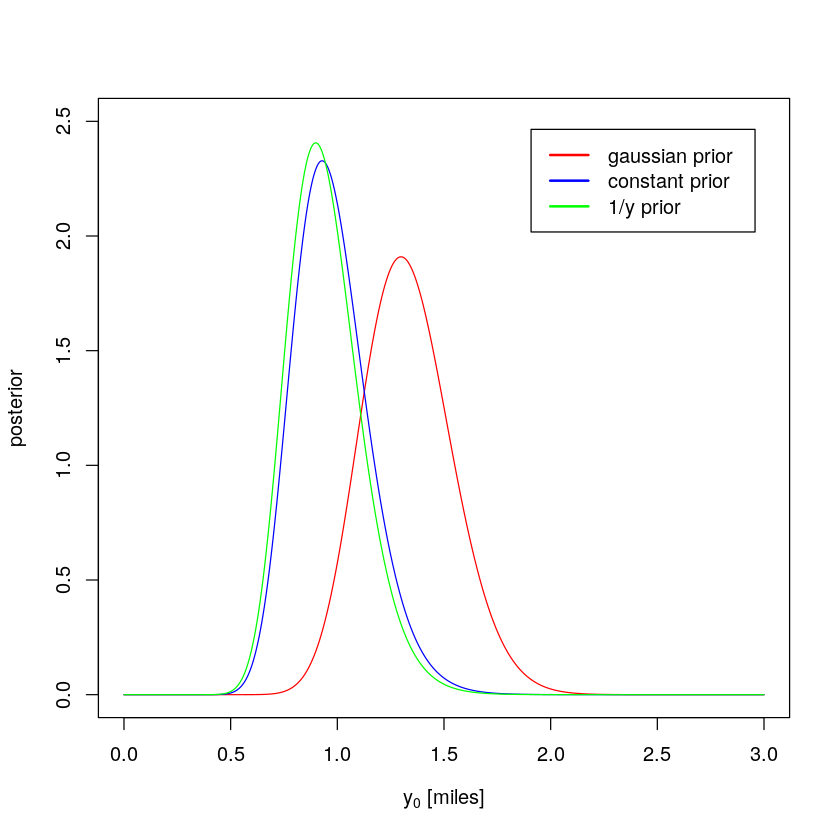

In [14]:
# plot the posterior dependend on y

plot(yseq,p2,'l',col='red',ylim=c(0,2.5),xlab=expression('y'[0]*' [miles]'),
     ylab='posterior')
lines(yseq,pcons2,col='blue')
lines(yseq,pinv2,col='green')

# legend
legend("topright", legend=c('gaussian prior','constant prior','1/y prior'),
       inset=.05, lwd=2, col=c('red','blue','green'))

Obviously, the prior shifts the results & posterior to different locations, hence the final results depend significantly on the prior. To get better estimates, one can try to use the resulting posterior with the initial prior as new "guess" of the prior and do the same computation again with the likelihood and new prior. By repeating this several times, an iterative process can be started and the posterior and results can be potentially improved.